table of contents
1. Prepare
2. Data Import, Encoding
3. EDA
4. write df

# Prepare

## Import Library

In [1]:
import os, random, time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

cmap = plt.get_cmap('tab10')

## Define pitch plot

In [26]:
import matplotlib.patches as patches

twitter_color = '#841d26'
COLOR = 'white'

XMAX, XMIN = 120, 0
YMAX, YMIN = 80, 0

def draw_pitches(nrows, ncols, colorbar=False):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 8*nrows if colorbar else 7*nrows), facecolor=twitter_color)
    
    fig.patch.set_facecolor('#141d26')
    

    for ax in axes.flatten():
        ax.patch.set_facecolor('#141d26')
        
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        

        ax.plot([0,120], [0, 0], color=COLOR)
        ax.plot([120,120], [0, 80], color=COLOR)
        ax.plot([120,0], [80,80], color=COLOR)
        ax.plot([0, 0], [80, 0], color=COLOR)
        ax.plot([60, 60], [0, 80], color=COLOR)
        ax.plot([0, 0], [36, 44], color=COLOR, linewidth=10)
        ax.plot([120, 120], [36, 44], color=COLOR, linewidth=10)

        centreCircle = plt.Circle((60, 40), 12, color=COLOR, fill=False)
        ax.add_patch(centreCircle)

        ax.plot([0, 18],  [18, 18], color=COLOR)
        ax.plot([18, 18],  [18, 62], color=COLOR)
        ax.plot([18, 0],  [62, 62], color=COLOR)
        ax.plot([0, 6],  [30, 30], color=COLOR)
        ax.plot([6, 6],  [30, 50], color=COLOR)
        ax.plot([6, 0],  [50, 50], color=COLOR)

        ax.plot([120, 102],  [18, 18], color=COLOR)
        ax.plot([102, 102],  [18, 62], color=COLOR)
        ax.plot([102, 120],  [62, 62], color=COLOR)
        ax.plot([120, 114],  [30, 30], color=COLOR)
        ax.plot([114, 114],  [30, 50], color=COLOR)
        ax.plot([114, 120],  [50, 50], color=COLOR)

        ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

    return fig, axes

(<Figure size 1440x1008 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x6cb16f550>,
       dtype=object))

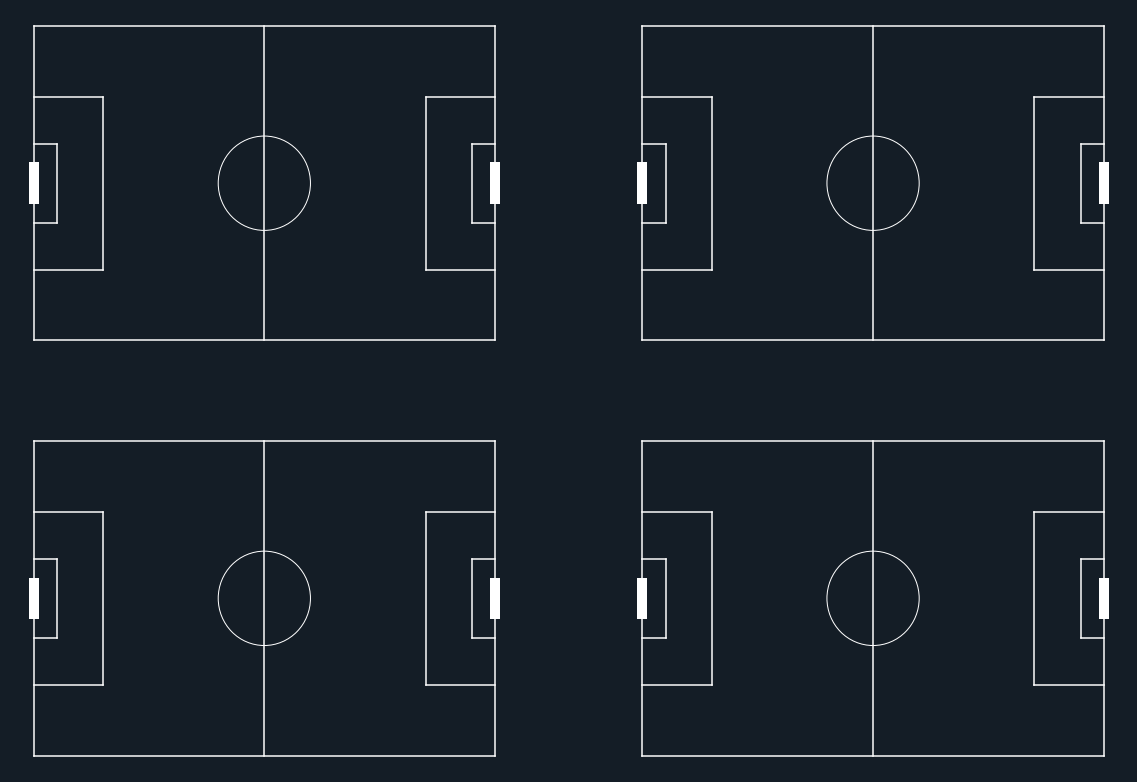

In [27]:
draw_pitches(nrows=2, ncols=2)

## define parameter

In [4]:
base_dir = os.path.join('..','..')
data_dir = os.path.join(base_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')

infile_list = os.listdir(raw_dir)
for i, infile in enumerate(infile_list):
    print(i, infile)

0 referees.json
1 teams.json
2 matches
3 competitions.json
4 events
5 players.json
6 coaches.json


# Data Import, Encoding

## Data Import

In [5]:
infile_list = os.listdir(os.path.join(raw_dir, 'events'))
df_dict = {}
for infile in infile_list:
    df = pd.read_json(os.path.join(raw_dir, 'events', infile))
    df_dict[infile.split('.')[0]] = df

## check data

In [6]:
for k, df in df_dict.items():
    print(k)
    display(df.head())

events_France


eventId           subEventName                         tags  playerId  \
0        8            Simple pass               [{'id': 1801}]    253784   
1        8              High pass               [{'id': 1801}]     29474   
2        1               Air duel  [{'id': 703}, {'id': 1801}]    253784   
3        1               Air duel  [{'id': 701}, {'id': 1802}]     56441   
4        1  Ground attacking duel  [{'id': 702}, {'id': 1801}]    366760   

                                  positions  matchId eventName  teamId  \
0  [{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]  2500686      Pass    3799   
1  [{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]  2500686      Pass    3799   
2  [{'y': 74, 'x': 68}, {'y': 54, 'x': 72}]  2500686      Duel    3799   
3  [{'y': 26, 'x': 32}, {'y': 46, 'x': 28}]  2500686      Duel    3772   
4  [{'y': 54, 'x': 72}, {'y': 55, 'x': 73}]  2500686      Duel    3799   

  matchPeriod  eventSec subEventId         id  
0          1H  1.935181         85  176505119  
1          1H  3.599295         83  176505121  
2          1H  6.827043         10  176505122  
3          1H  6.985577         10  176505017  
4          1H  9.511272         11  176505124

events_Spain


eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]      3542   
1        8  Simple pass  [{'id': 1801}]    274435   
2        8  Simple pass  [{'id': 1801}]    364860   
3        8  Simple pass  [{'id': 1801}]      3534   
4        8  Simple pass  [{'id': 1801}]      3695   

                                  positions  matchId eventName  teamId  \
0  [{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]  2565548      Pass     682   
1  [{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]  2565548      Pass     682   
2  [{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]  2565548      Pass     682   
3  [{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]  2565548      Pass     682   
4  [{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]  2565548      Pass     682   

  matchPeriod   eventSec subEventId         id  
0          1H   2.994582         85  180864419  
1          1H   3.137020         85  180864418  
2          1H   6.709668         85  180864420  
3          1H   8.805497         85  180864421  
4          1H  14.047492         85  180864422

events_Germany


eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]     15231   
1        8  Simple pass  [{'id': 1801}]     14786   
2        8  Simple pass  [{'id': 1801}]     14803   
3        8  Simple pass  [{'id': 1801}]     14768   
4        8  Simple pass  [{'id': 1801}]     14803   

                                  positions  matchId eventName  teamId  \
0  [{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]  2516739      Pass    2446   
1  [{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]  2516739      Pass    2446   
2   [{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]  2516739      Pass    2446   
3   [{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]  2516739      Pass    2446   
4   [{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]  2516739      Pass    2446   

  matchPeriod   eventSec subEventId         id  
0          1H   2.409746         85  179896442  
1          1H   2.506082         85  179896443  
2          1H   6.946706         85  179896444  
3          1H  10.786491         85  179896445  
4          1H  12.684514         85  179896446

events_European_Championship


eventId           subEventName                         tags  playerId  \
0        8            Simple pass               [{'id': 1801}]     26010   
1        8            Simple pass               [{'id': 1801}]      3682   
2        8            Simple pass               [{'id': 1801}]     31528   
3        8              High pass               [{'id': 1802}]      7855   
4        1  Ground defending duel  [{'id': 702}, {'id': 1801}]     25437   

                                  positions  matchId eventName  teamId  \
0  [{'y': 48, 'x': 50}, {'y': 50, 'x': 47}]  1694390      Pass    4418   
1  [{'y': 50, 'x': 47}, {'y': 48, 'x': 41}]  1694390      Pass    4418   
2  [{'y': 48, 'x': 41}, {'y': 35, 'x': 32}]  1694390      Pass    4418   
3   [{'y': 35, 'x': 32}, {'y': 6, 'x': 89}]  1694390      Pass    4418   
4    [{'y': 6, 'x': 89}, {'y': 0, 'x': 85}]  1694390      Duel    4418   

  matchPeriod   eventSec subEventId        id  
0          1H   1.255990         85  88178642  
1          1H   2.351908         85  88178643  
2          1H   3.241028         85  88178644  
3          1H   6.033681         83  88178645  
4          1H  13.143591         12  88178646

events_World_Cup


eventId subEventName                         tags  playerId  \
0        8  Simple pass               [{'id': 1801}]    122671   
1        8    High pass               [{'id': 1801}]    139393   
2        1     Air duel  [{'id': 703}, {'id': 1801}]    103668   
3        1     Air duel  [{'id': 701}, {'id': 1802}]    122940   
4        8  Simple pass               [{'id': 1801}]    122847   

                                  positions  matchId eventName  teamId  \
0  [{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]  2057954      Pass   16521   
1  [{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]  2057954      Pass   16521   
2  [{'y': 81, 'x': 25}, {'y': 83, 'x': 37}]  2057954      Duel   14358   
3  [{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]  2057954      Duel   16521   
4  [{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]  2057954      Pass   16521   

  matchPeriod  eventSec subEventId         id  
0          1H  1.656214         85  258612104  
1          1H  4.487814         83  258612106  
2          1H  5.937411         10  258612077  
3          1H  6.406961         10  258612112  
4          1H  8.562167         85  258612110

events_Italy


eventId           subEventName                                      tags  \
0        8            Simple pass                            [{'id': 1801}]   
1        8            Simple pass                            [{'id': 1801}]   
2        7                  Touch                                        []   
3        1  Ground attacking duel  [{'id': 504}, {'id': 703}, {'id': 1801}]   
4        1  Ground attacking duel  [{'id': 503}, {'id': 703}, {'id': 1801}]   

   playerId                                 positions  matchId  \
0      8327  [{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]  2575959   
1     20438  [{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]  2575959   
2      8306  [{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]  2575959   
3      8306  [{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]  2575959   
4      8306  [{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]  2575959   

            eventName  teamId matchPeriod  eventSec subEventId         id  
0                Pass    3158          1H  2.530536         85  180423957  
1                Pass    3158          1H  3.768418         85  180423958  
2  Others on the ball    3158          1H  4.868265         72  180423959  
3                Duel    3158          1H  8.114676         11  180423960  
4                Duel    3158          1H  8.647892         11  180423961

events_England


eventId subEventName            tags  playerId  \
0        8  Simple pass  [{'id': 1801}]     25413   
1        8    High pass  [{'id': 1801}]    370224   
2        8    Head pass  [{'id': 1801}]      3319   
3        8    Head pass  [{'id': 1801}]    120339   
4        8  Simple pass  [{'id': 1801}]    167145   

                                  positions  matchId eventName  teamId  \
0  [{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]  2499719      Pass    1609   
1  [{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]  2499719      Pass    1609   
2  [{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]  2499719      Pass    1609   
3  [{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]  2499719      Pass    1609   
4  [{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]  2499719      Pass    1609   

  matchPeriod   eventSec subEventId         id  
0          1H   2.758649         85  177959171  
1          1H   4.946850         83  177959172  
2          1H   6.542188         82  177959173  
3          1H   8.143395         82  177959174  
4          1H  10.302366         85  177959175

# EDA

In [7]:
for k, df in df_dict.items():
    print(f'{k}')
    print(f'\t- Number of matches = {len(df.id.unique())}')
    print(f'\t- Number of rows = {len(df)}')
    print(f'\t- Number of eventId = {len(df.eventId.unique())}')
    print(f'\t- Number of subEventId = {len(df.subEventId.unique())}')

events_France
	- Number of matches = 632807
	- Number of rows = 632807
	- Number of eventId = 10
	- Number of subEventId = 36
events_Spain
	- Number of matches = 628659
	- Number of rows = 628659
	- Number of eventId = 10
	- Number of subEventId = 36
events_Germany
	- Number of matches = 519407
	- Number of rows = 519407
	- Number of eventId = 10
	- Number of subEventId = 36
events_European_Championship
	- Number of matches = 78140
	- Number of rows = 78140
	- Number of eventId = 10
	- Number of subEventId = 35
events_World_Cup
	- Number of matches = 101759
	- Number of rows = 101759
	- Number of eventId = 9
	- Number of subEventId = 34
events_Italy
	- Number of matches = 647372
	- Number of rows = 647372
	- Number of eventId = 10
	- Number of subEventId = 36
events_England
	- Number of matches = 643150
	- Number of rows = 643150
	- Number of eventId = 10
	- Number of subEventId = 36


In [8]:
df.subEventName.unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [9]:
df.eventName.unique()

array(['Pass', 'Duel', 'Foul', 'Free Kick', 'Shot', 'Save attempt',
       'Others on the ball', 'Interruption', 'Goalkeeper leaving line',
       'Offside'], dtype=object)

# visualize pass line

In [10]:
cup = 'European_Championship'

df = df_dict[f'events_{cup}']
team_df = pd.read_json(os.path.join(raw_dir, 'teams.json'))

player_df = pd.read_json(os.path.join(raw_dir, 'players.json'))

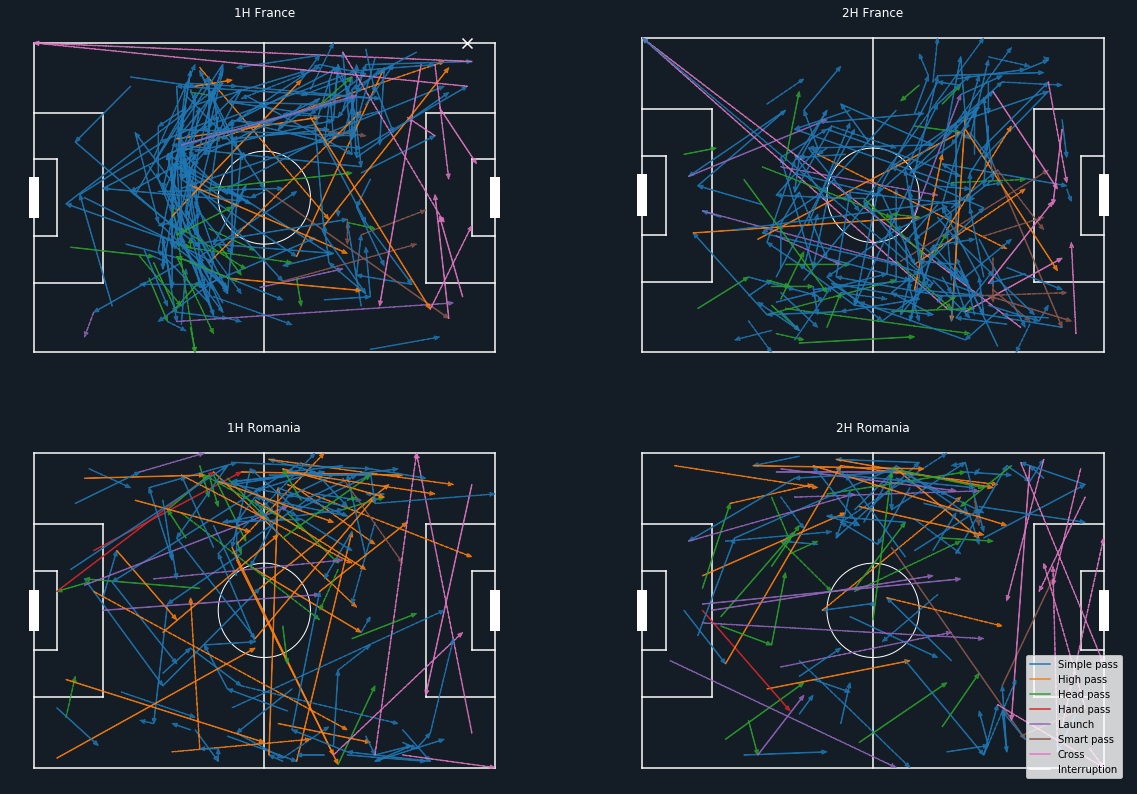

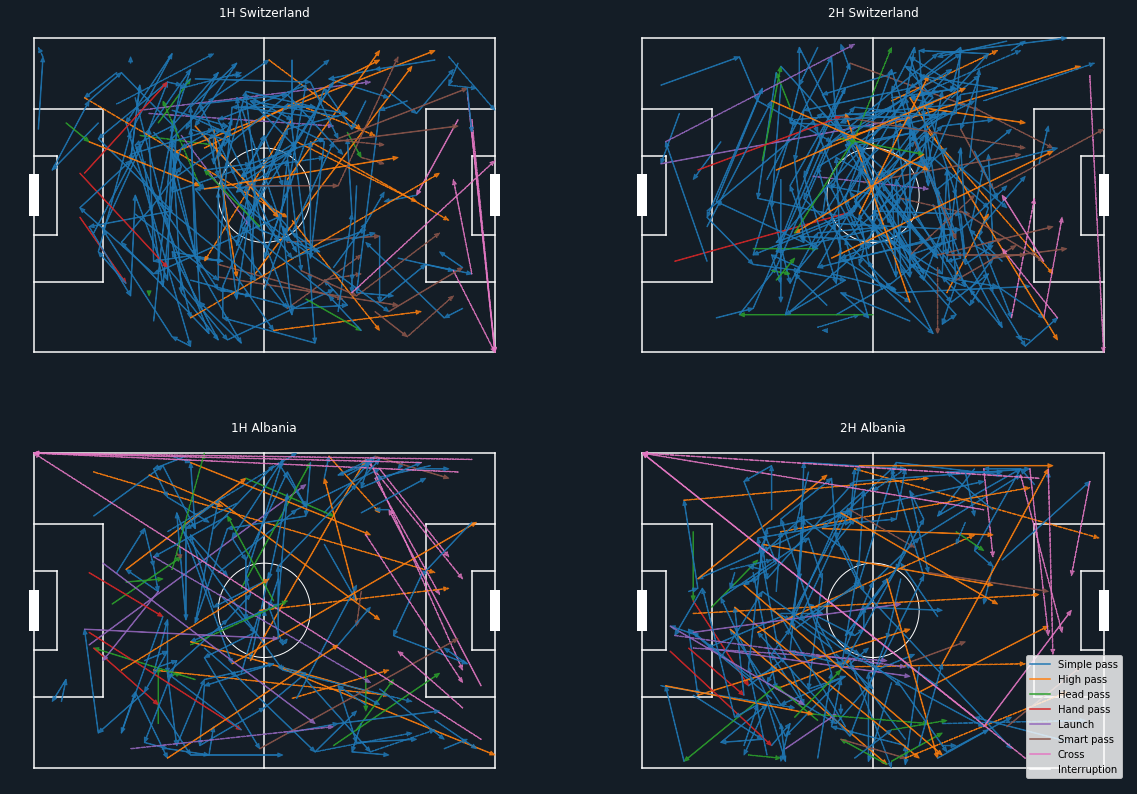

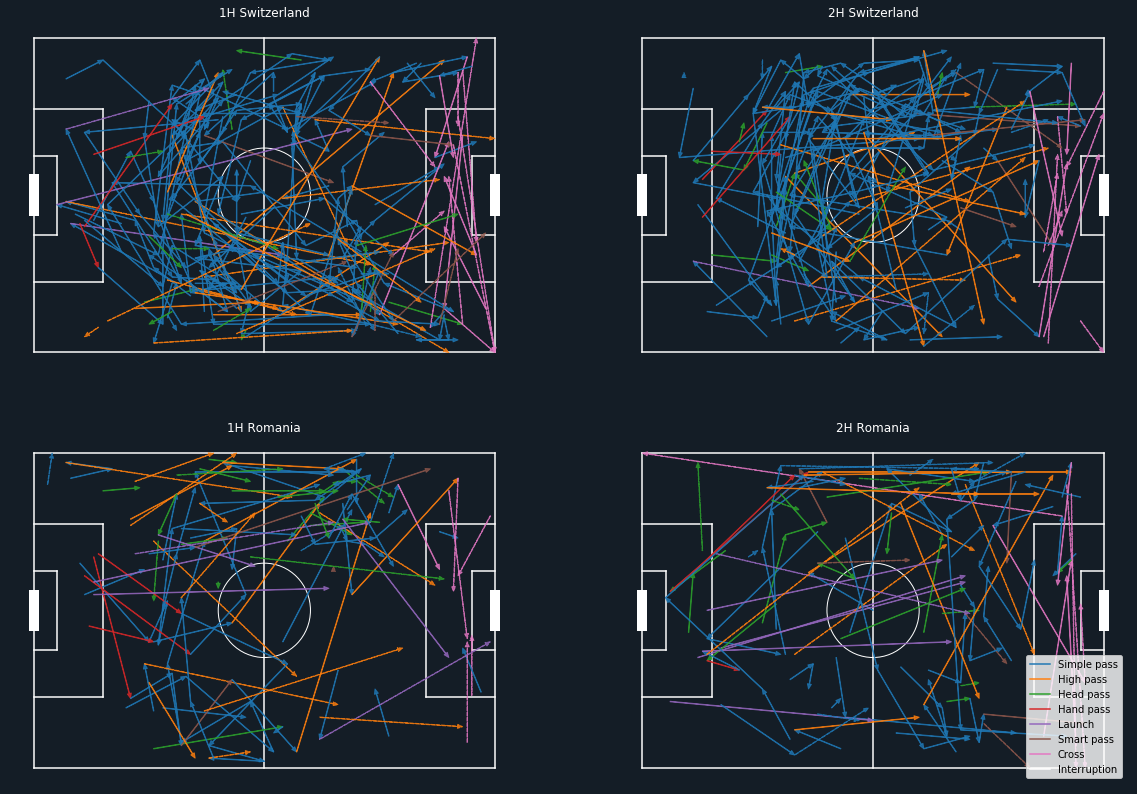

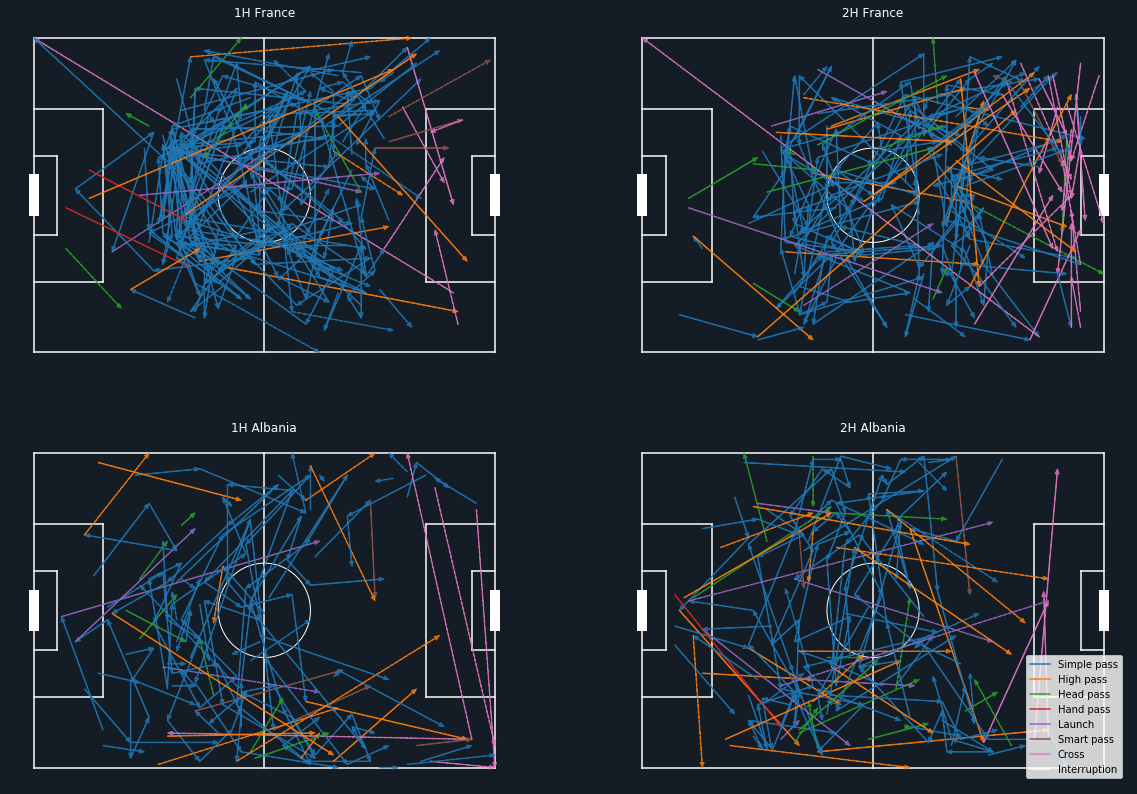

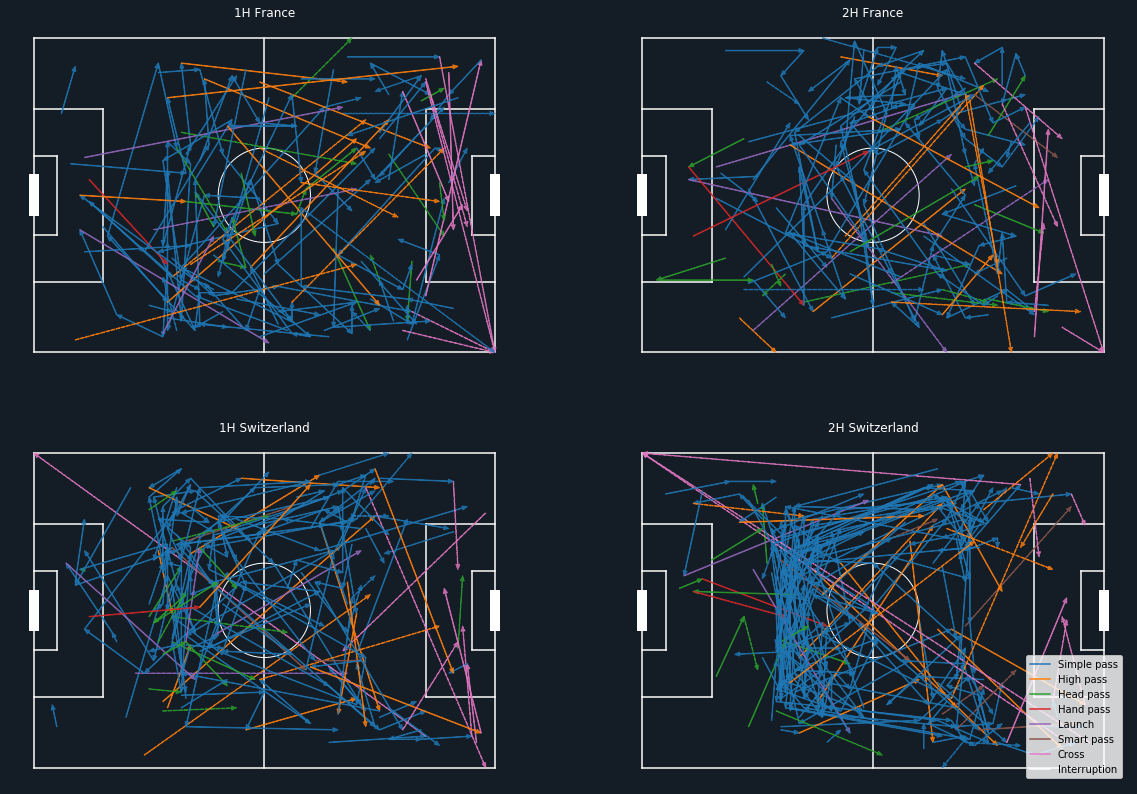

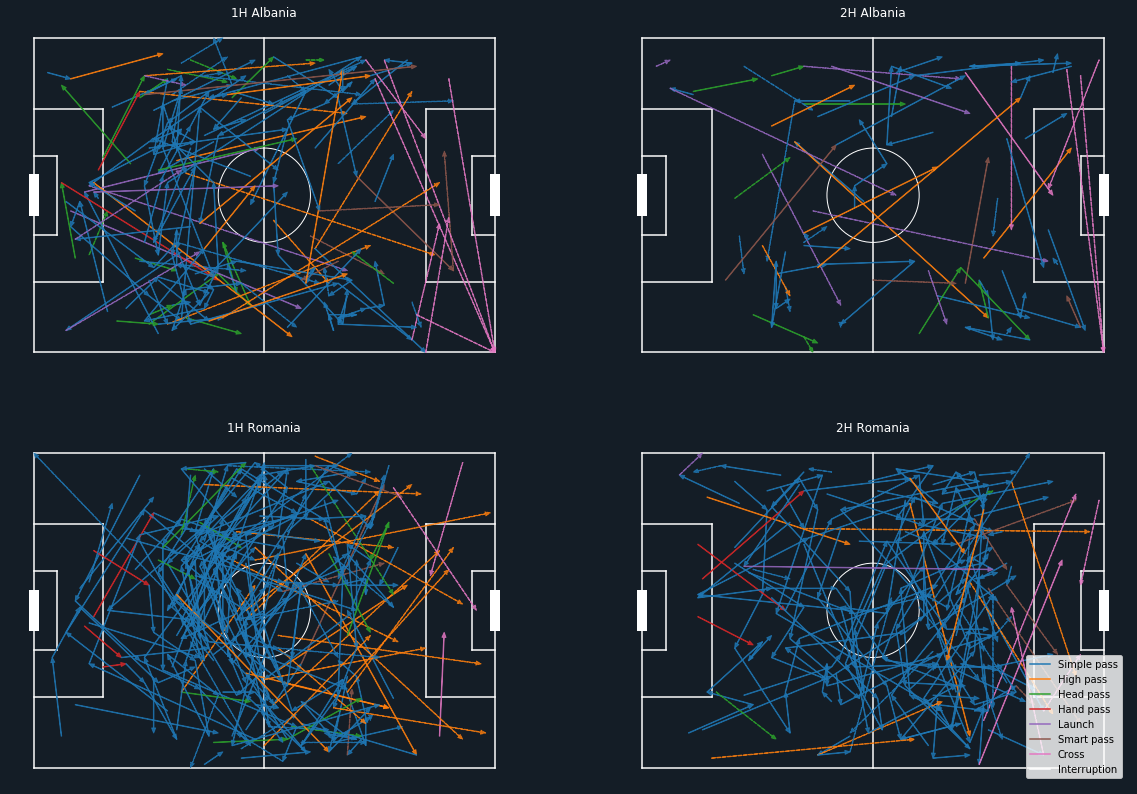

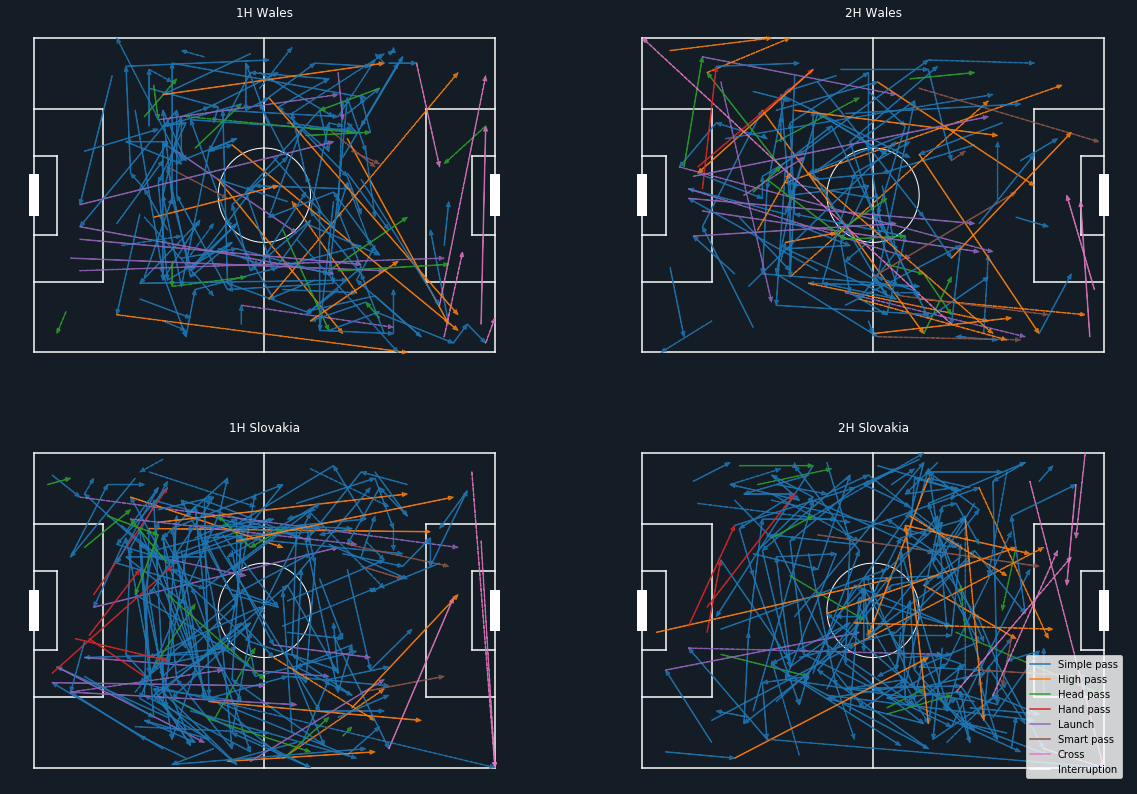

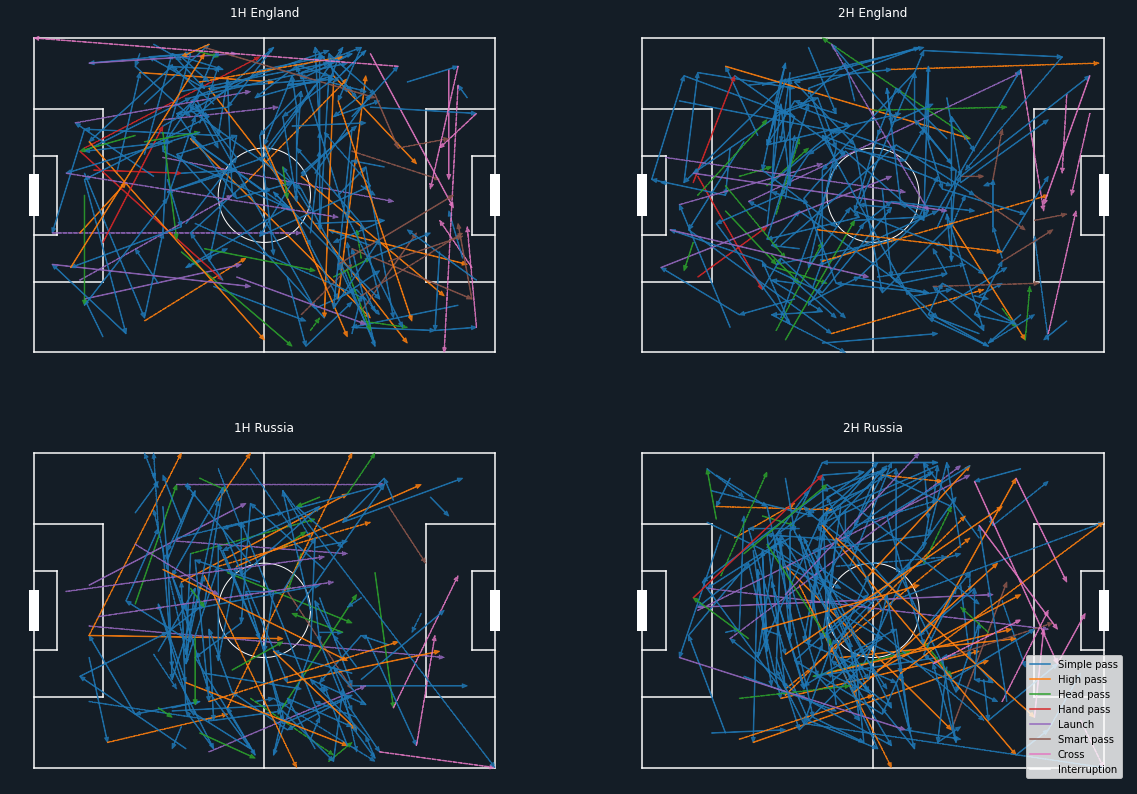

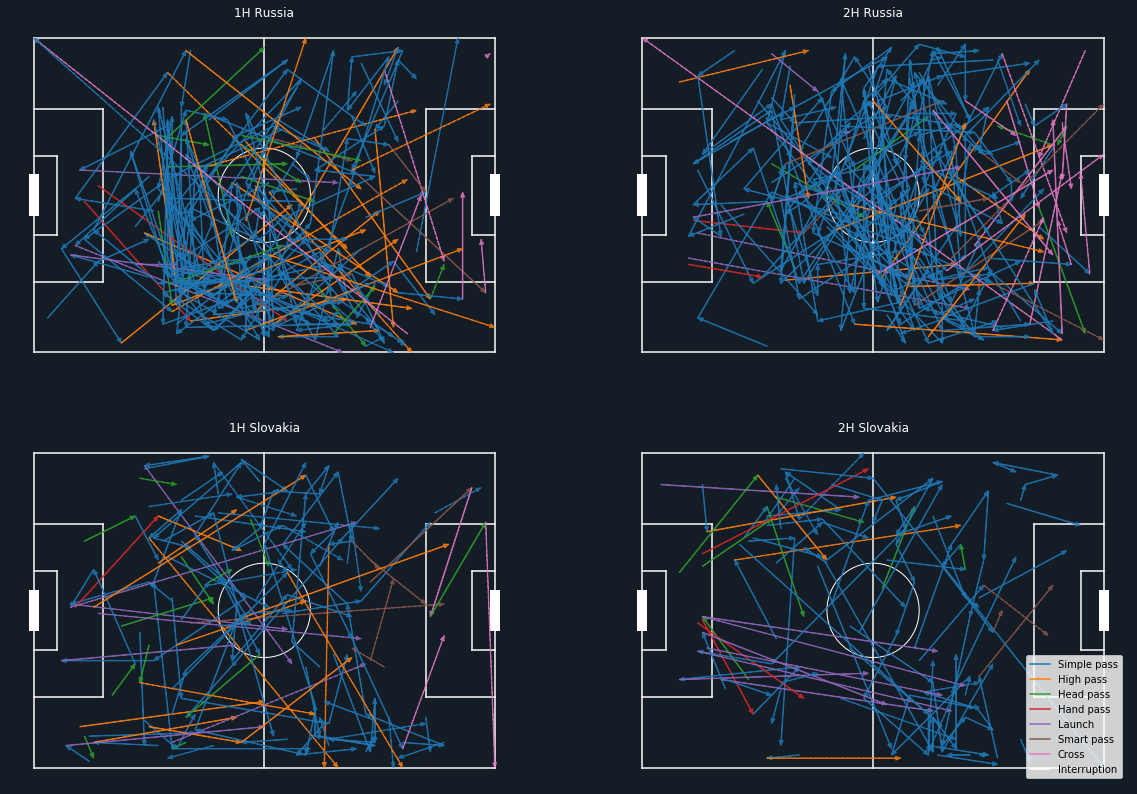

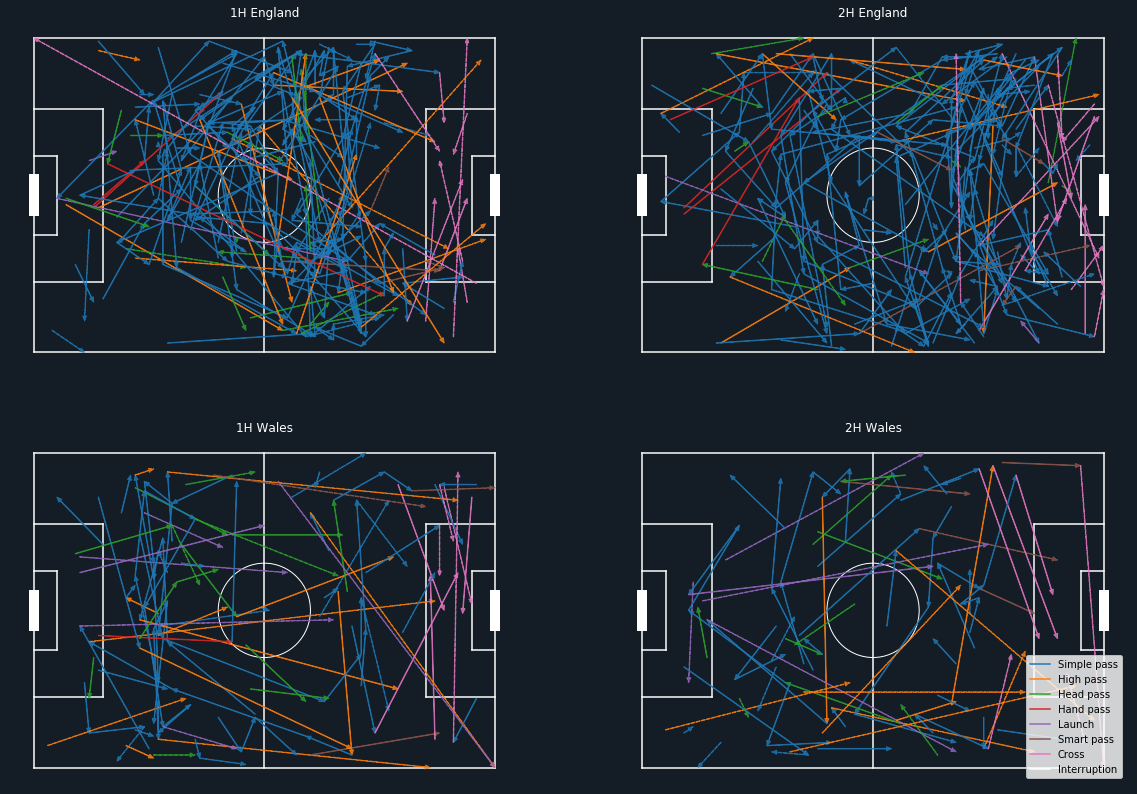

In [39]:
from matplotlib.lines import Line2D

subEventName_list = df[df.eventName=='Pass'].subEventName.unique().tolist()

for matchId in df.matchId.unique().tolist()[:10]:

    df_tmp = df[(df.matchId == matchId)&(df.eventName.isin(['Pass', 'Interruption']))]

    fig, axes = draw_pitches(nrows=2, ncols=2)

    x_list, y_list = [], []

    for i, (matchPeriod, teamId) in enumerate(df_tmp[['matchPeriod', 'teamId']].drop_duplicates().sort_values(by=['teamId', 'matchPeriod']).values.tolist()):
        ax = axes[int(i/2), i%2]
        team_name = team_df[team_df.wyId==teamId].name.values[0]
        ax.set_title(f'{matchPeriod} {team_name}', color='white')

        for (positions, subEventName, tags) in df_tmp[(df_tmp.eventName=='Pass')&(df_tmp.matchPeriod==matchPeriod)&(df_tmp.teamId==teamId)][['positions', 'subEventName', 'tags']].values.tolist():
            ed_x, ed_y = XMAX * positions[1]['x'] / 100, YMAX * (1 - positions[1]['y'] / 100)
            st_x, st_y = XMAX * positions[0]['x'] / 100, YMAX * (1 - positions[0]['y'] / 100)
            id_list = [tag_dict['id'] for tag_dict in tags]

            ax.annotate('', xy=[ed_x, ed_y], xytext=[st_x, st_y],
                    arrowprops=dict(shrink=0, width=0.5, headwidth=4, alpha=0.8,
                                    headlength=5, connectionstyle='arc3',
                                    facecolor=cmap(subEventName_list.index(subEventName)), edgecolor=cmap(subEventName_list.index(subEventName))
                                    , linestyle= 'solid' if 1801 in id_list else 'dashed'
                                   )

                   )

        for positions in df_tmp[(df_tmp.eventName=='Interruption')&(df_tmp.matchPeriod==matchPeriod)&(df_tmp.teamId==teamId)]['positions'].values.tolist():
            st_x, st_y = XMAX * positions[0]['x'] / 100, YMAX * (1 - positions[0]['y'] / 100)
            ax.scatter(x=st_x, y=st_y, c='white', s=100, marker='x')


        if i == 3:
            ax.legend([Line2D([0], [0], color=cmap(j)) for j in range(len(subEventName_list))]+[Line2D([0], [0], color='white')], subEventName_list+['Interruption'], loc='lower right')

パスラインから相手の守備の分析ができそう。ブロックの重心等。

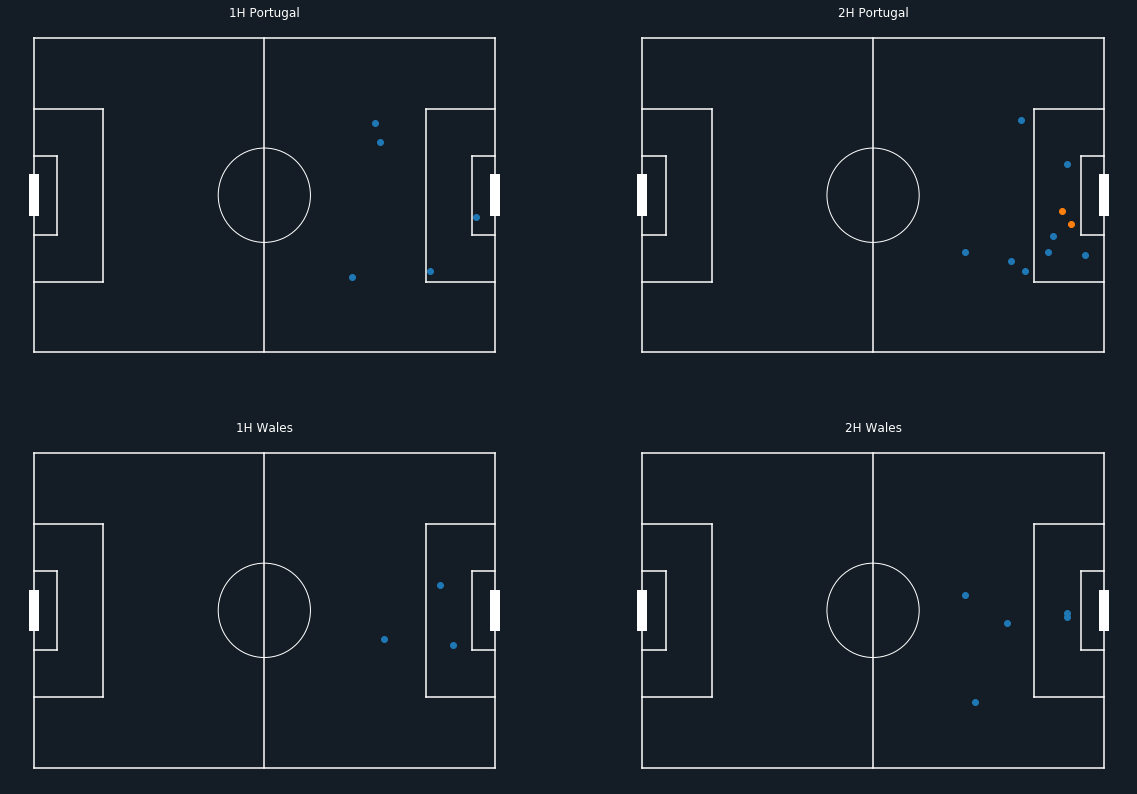

In [99]:
matchId_list = df.matchId.unique().tolist()
matchId = matchId_list[-3]

df_tmp = df[(df.matchId == matchId)&(df.eventName=='Shot')]

subEventName_list = df_tmp.subEventName.unique().tolist()

fig, axes = draw_pitches(nrows=2, ncols=2)
# fig.suptitle(subEventName_list)

x_list, y_list = [], []

for i, (matchPeriod, teamId) in enumerate(df_tmp[['matchPeriod', 'teamId']].drop_duplicates().sort_values(by=['teamId', 'matchPeriod']).values.tolist()):
    ax = axes[int(i/2), i%2]
    team_name = team_df[team_df.wyId==teamId].name.values[0]
    ax.set_title(f'{matchPeriod} {team_name}')
    for (positions, tags) in df_tmp[(df_tmp.matchPeriod==matchPeriod)&(df_tmp.teamId==teamId)][['positions', 'tags']].values.tolist():
        id_list = [tag_dict['id'] for tag_dict in tags]
    
        st_x, st_y = XMAX * positions[0]['x'] / 100, YMAX * (1 - positions[0]['y'] / 100)
        
        ax.scatter(x=st_x, y=st_y, c = cmap(1) if 101 in id_list else cmap(0))

# write df

In [15]:
for k, df in df_dict.items():
    df.to_csv(os.path.join(processed_dir, 'events', f'{k}.csv'), index=False)